# Up-to-date liquor data
This is a cursory analysis of the Iowa State Liquor data 

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Some light data cleaning

In [40]:
# Loading in the small version, uncomment below for full
# df = pd.read_csv('Data/Iowa_Liquor_Sales.csv')
df = pd.read_csv('Data/Iowa_Liquor_Sales_Small.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.drop('Volume Sold (Gallons)', axis=1, inplace=True) # Already have in litres
df.drop('Invoice/Item Number', axis=1, inplace=True) # Not significant
df.drop('Store Number', axis=1, inplace=True) # Not significant
df.drop('Vendor Number', axis=1, inplace=True) # Not significant
df.drop('Address', axis=1, inplace=True) # Can reverse from zip+store location


In [41]:
#rename the columns
cols = [
    'date', 'store', 'city', 'zip', 'store_location', 'county_num', 'county', 'cat', 
    'cat_name', 'vendor', 'item_num', 'item', 'pack_size', 'bottle_vol', 'bottle_cost',
    'bottle_cost_retail', 'bottles_sold', 'sales', 'volume_sold'
]
df.columns = cols

In [42]:
df.columns

Index(['date', 'store', 'city', 'zip', 'store_location', 'county_num',
       'county', 'cat', 'cat_name', 'vendor', 'item_num', 'item', 'pack_size',
       'bottle_vol', 'bottle_cost', 'bottle_cost_retail', 'bottles_sold',
       'sales', 'volume_sold'],
      dtype='object')

In [43]:
df.shape

(99999, 19)

## Exploration

In [44]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

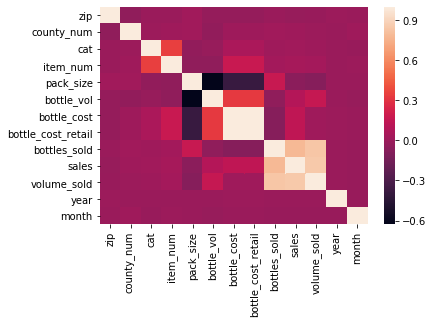

In [47]:
sns.heatmap(df.corr());

Next, I'm going to add the population data and see if that affects any metrics

In [76]:
pop = pd.read_csv('Data/Iowa_population_by_county.csv')
pop['CTYNAME'] = pop['CTYNAME'].map(lambda x: x.replace(' County', '').upper())
pop.columns = ['county', 'county_population', 'county_growth_rate'] 
pop = pop.drop('county_growth_rate', axis=1)
pop.head()

,county,county_population
0,POLK,487204
1,LINN,225909
2,SCOTT,173283
3,JOHNSON,151260
4,BLACK HAWK,132408


In [159]:
df_pop = pd.merge(df, pop, on='county')

df_pop = df_pop.drop('year', axis=1)

In [160]:
df_pop.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,item,pack_size,bottle_vol,bottle_cost,bottle_cost_retail,bottles_sold,sales,volume_sold,month,county_population
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,Captain Morgan Spiced Rum Mini,12,500,4.80,7.20,1,7.20,0.50,6,46518
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,Western Son Blueberry Vodka Mini,6,50,4.83,7.25,4,29.00,0.20,6,46518
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,Jack Daniels Old #7 Black Lbl,12,750,15.57,23.36,24,560.64,18.00,6,46518
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,Cream Liqueurs,DIAGEO AMERICAS,...,Godiva Liqueur,12,750,17.00,25.50,3,76.50,2.25,6,46518
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,American Cordials & Liqueur,Prestige Wine & Spirits Group,...,Kinky Liqueur,12,375,5.00,7.50,1,7.50,0.38,6,46518


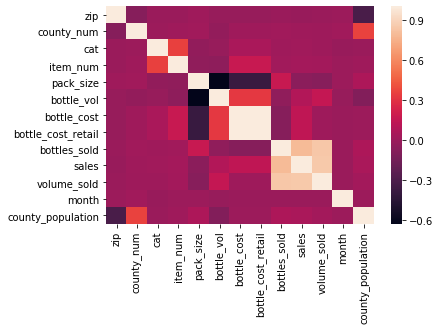

In [161]:
sns.heatmap(df_pop.corr());

In [162]:
df_pop.isnull().sum()

date                     0
store                    0
city                     0
zip                      0
store_location        8338
county_num               0
county                   0
cat                     74
cat_name                74
vendor                   0
item_num                 0
item                     0
pack_size                0
bottle_vol               0
bottle_cost              0
bottle_cost_retail       0
bottles_sold             0
sales                    0
volume_sold              0
month                    0
county_population        0
dtype: int64

In [163]:
top_categories = df_pop['cat_name'].value_counts()

In [164]:
tc = top_categories.to_dict()

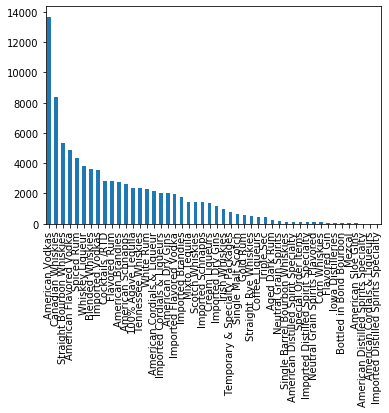

In [165]:
top_categories.plot.bar();

In [166]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [175]:
df_cats = df_pop.copy()
n = 30
top_n_cats = set(take(n, tc.keys()))
top_n_cats

{'100% Agave Tequila',
 'American Brandies',
 'American Cordials & Liqueur',
 'American Dry Gins',
 'American Flavored Vodka',
 'American Schnapps',
 'American Vodkas',
 'Blended Whiskies',
 'Canadian Whiskies',
 'Cocktails /RTD',
 'Cream Liqueurs',
 'Flavored Rum',
 'Gold Rum',
 'Imported Brandies',
 'Imported Cordials & Liqueurs',
 'Imported Dry Gins',
 'Imported Flavored Vodka',
 'Imported Schnapps',
 'Imported Vodkas',
 'Irish Whiskies',
 'Mixto Tequila',
 'Scotch Whiskies',
 'Single Malt Scotch',
 'Spiced Rum',
 'Straight Bourbon Whiskies',
 'Straight Rye Whiskies',
 'Temporary & Specialty Packages',
 'Tennessee Whiskies',
 'Whiskey Liqueur',
 'White Rum'}

In [176]:
to_other = lambda x: x if x in top_n_cats else 'other' # Now it's just the top n categories + others (for one hot)
df_cats['cat_name'] = df_cats['cat_name'].map(to_other)

In [177]:
df_pop.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,item,pack_size,bottle_vol,bottle_cost,bottle_cost_retail,bottles_sold,sales,volume_sold,month,county_population
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,Captain Morgan Spiced Rum Mini,12,500,4.80,7.20,1,7.20,0.50,6,46518
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,Western Son Blueberry Vodka Mini,6,50,4.83,7.25,4,29.00,0.20,6,46518
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,Jack Daniels Old #7 Black Lbl,12,750,15.57,23.36,24,560.64,18.00,6,46518
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,Cream Liqueurs,DIAGEO AMERICAS,...,Godiva Liqueur,12,750,17.00,25.50,3,76.50,2.25,6,46518
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,American Cordials & Liqueur,Prestige Wine & Spirits Group,...,Kinky Liqueur,12,375,5.00,7.50,1,7.50,0.38,6,46518


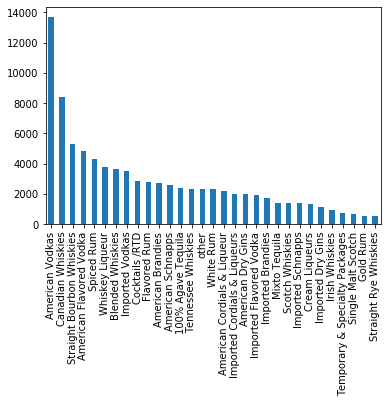

In [180]:
df_cats['cat_name'].value_counts().plot.bar()

In [184]:
df_oh = df_cats.copy()
df_oh = df_oh.join(pd.get_dummies(df_cats['cat_name']))

In [186]:
df_oh.head()

,date,store,city,zip,store_location,county_num,county,cat,cat_name,vendor,...,Scotch Whiskies,Single Malt Scotch,Spiced Rum,Straight Bourbon Whiskies,Straight Rye Whiskies,Temporary & Specialty Packages,Tennessee Whiskies,Whiskey Liqueur,White Rum,other
0,2018-06-20,Wheatland Day Break,Wheatland,52777.0,POINT (-90.841518 41.82906),23.0,CLINTON,1062400.0,Spiced Rum,DIAGEO AMERICAS,...,0,0,1,0,0,0,0,0,0,0
1,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1031200.0,American Flavored Vodka,JEM Beverage Company,...,0,0,0,0,0,0,0,0,0,0
2,2018-06-20,Wal-Mart 2889 / Clinton,Clinton,52732.0,POINT (-90.245005 41.818874),23.0,CLINTON,1011400.0,Tennessee Whiskies,Brown Forman Corp.,...,0,0,0,0,0,0,1,0,0,0
3,2018-06-20,Hy-Vee Food and Drug / Clinton,Clinton,52732.0,POINT (-90.193204 41.836268000000004),23.0,CLINTON,1081200.0,Cream Liqueurs,DIAGEO AMERICAS,...,0,0,0,0,0,0,0,0,0,0
4,2018-06-20,Sa Tobacco Liquor Mart,Clinton,52732.0,POINT (-90.193275 41.848124),23.0,CLINTON,1081300.0,American Cordials & Liqueur,Prestige Wine & Spirits Group,...,0,0,0,0,0,0,0,0,0,0


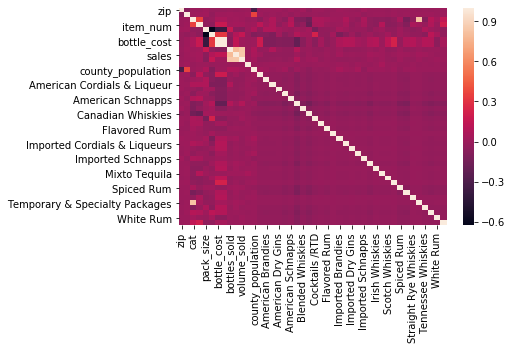

In [187]:
sns.heatmap(df_oh.corr());

## Entering new data

The 2018 estimates!

In [232]:
census = pd.read_csv('Data/Iowa_2018_census.csv')

census = census[census['Year'] == '2018 population estimate']
census = census.drop(['State Name', 'State', 'Sumlev', 'Number of Records', 'Year', 'County', 'Hispanic or Latino origin'], axis=1)
census['County Name'] = census['County Name'].map(lambda x: x.replace(' County', ''))

In [233]:
census.head()

,Age group,County Name,Data,Sex,Race
19,Total population,Delaware,31,Female,Asian alone
20,0 to 4 years of age,Delaware,1,Female,Asian alone
21,5 to 9 years of age,Delaware,0,Female,Asian alone
22,10 to 14 years of age,Delaware,4,Female,Asian alone
23,15 to 19 years of age,Delaware,2,Female,Asian alone


Idea here is that perhaps the male-female ratios will affect anything?

In [236]:
census['Age group'].value_counts()

65 to 69 years of age       6237
Total population            6237
35 to 39 years of age       6237
5 to 9 years of age         6237
80 to 84 years of age       6237
40 to 44 years of age       6237
50 to 54 years of age       6237
55 to 59 years of age       6237
0 to 4 years of age         6237
75 to 79 years of age       6237
85 years of age and over    6237
20 to 24 years of age       6237
70 to 74 years of age       6237
15 to 19 years of age       6237
10 to 14 years of age       6237
25 to 29 years of age       6237
45 to 49 years of age       6237
60 to 64 years of age       6237
30 to 34 years of age       6237
Name: Age group, dtype: int64

In [226]:
census.shape

(118503, 7)

In [227]:
census.isnull().sum()

Age group                    0
County                       0
County Name                  0
Data                         0
Sex                          0
Hispanic or Latino origin    0
Race                         0
dtype: int64